In [1]:
import numpy as np
import pandas as pd
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
match.shape

(756, 18)

In [3]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
delivery[delivery['match_id']==35]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8105,35,1,Delhi Daredevils,Kings XI Punjab,1,1,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8106,35,1,Delhi Daredevils,Kings XI Punjab,1,2,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8107,35,1,Delhi Daredevils,Kings XI Punjab,1,3,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8108,35,1,Delhi Daredevils,Kings XI Punjab,1,4,SV Samson,SW Billings,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8109,35,1,Delhi Daredevils,Kings XI Punjab,1,5,SW Billings,SV Samson,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,35,2,Kings XI Punjab,Delhi Daredevils,8,1,MJ Guptill,HM Amla,S Nadeem,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8258,35,2,Kings XI Punjab,Delhi Daredevils,8,2,HM Amla,MJ Guptill,S Nadeem,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8259,35,2,Kings XI Punjab,Delhi Daredevils,8,3,MJ Guptill,HM Amla,S Nadeem,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
8260,35,2,Kings XI Punjab,Delhi Daredevils,8,4,MJ Guptill,HM Amla,S Nadeem,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df['total_runs']=total_score_df['total_runs']+1
total_score_df

total_score_df=total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [7]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [8]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Punjab Kings',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals']

In [10]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['winner']=match_df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['winner']=match_df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['winner']=match_df['winner'].str.replace('Kings XI Punjab','Punjab Kings')
delivery['batting_team']=delivery['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery['bowling_team']=delivery['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery['batting_team']=delivery['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery['bowling_team']=delivery['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery['batting_team']=delivery['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery['bowling_team']=delivery['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

In [11]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [12]:
match_df.shape

(641, 20)

In [13]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,0,Punjab Kings,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


In [14]:
match_df['dl_applied'].value_counts()

dl_applied
0    626
1     15
Name: count, dtype: int64

In [15]:
match_df=match_df[match_df['dl_applied']==0]
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,0,Punjab Kings,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


In [16]:
match_df.shape

(626, 20)

In [17]:
match_df=match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Punjab Kings,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [18]:
delivery_df=match_df.merge(delivery,on='match_id')

In [19]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
delivery_df.shape

(149578, 24)

In [21]:
delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [22]:
delivery_df.shape

(72413, 24)

In [24]:
import pandas as pd

# Check the data type of total_runs_y
print(delivery_df['total_runs_y'].dtype)

# Convert total_runs_y to numeric if it's not already
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Perform the cumulative sum after grouping by match_id
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

# Display the updated DataFrame
print(delivery_df)



int64
        match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           208       2   
126            1  Hyderabad  Sunrisers Hyderabad           208       2   
127            1  Hyderabad  Sunrisers Hyderabad           208       2   
128            1  Hyderabad  Sunrisers Hyderabad           208       2   
129            1  Hyderabad  Sunrisers Hyderabad           208       2   
...          ...        ...                  ...           ...     ...   
149573     11415  Hyderabad       Mumbai Indians           153       2   
149574     11415  Hyderabad       Mumbai Indians           153       2   
149575     11415  Hyderabad       Mumbai Indians           153       2   
149576     11415  Hyderabad       Mumbai Indians           153       2   
149577     11415  Hyderabad       Mumbai Indians           153       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalo

In [25]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [26]:
delivery_df['balls_left']=126- (delivery_df['over']*6 + delivery_df['ball'])
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [30]:
import pandas as pd

# Ensure 'player_dismissed' is correctly converted to integers
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == "0" else 1)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

# Perform the cumulative sum operation after grouping by 'match_id'
delivery_df['cumulative_wickets'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Calculate the remaining wickets
delivery_df['wickets'] = 10 - delivery_df['cumulative_wickets']

# Display the updated DataFrame
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,cumulative_wickets,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,1,NaN,NaN,1,207,119,1,9
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,1,NaN,NaN,1,207,118,2,8
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,1,NaN,NaN,1,207,117,3,7
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,1,NaN,NaN,3,205,116,4,6
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,1,NaN,NaN,7,201,115,5,5


In [29]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,cumulative_wickets,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,1,NaN,NaN,1,207,119,1,9
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,1,NaN,NaN,1,207,118,2,8
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,1,NaN,NaN,1,207,117,3,7
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,1,NaN,NaN,3,205,116,4,6
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,1,NaN,NaN,7,201,115,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,1,NaN,NaN,152,1,4,120,-110
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,1,NaN,NaN,154,-1,3,121,-111
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-2,2,122,-112
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,1,NaN,NaN,157,-4,1,123,-113


In [31]:
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df[delivery_df['match_id'] == 11415]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,cumulative_wickets,wickets,crr
149454,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,1,F du Plessis,...,0,1,NaN,NaN,0,153,119,1,9,0.000000
149455,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,2,F du Plessis,...,0,1,NaN,NaN,0,153,118,2,8,0.000000
149456,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,3,F du Plessis,...,4,1,NaN,NaN,4,149,117,3,7,8.000000
149457,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,4,F du Plessis,...,1,1,NaN,NaN,5,148,116,4,6,7.500000
149458,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,1,5,SR Watson,...,0,1,NaN,NaN,5,148,115,5,5,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,1,NaN,NaN,152,1,4,120,-110,7.862069
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,1,NaN,NaN,154,-1,3,121,-111,7.897436
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,122,-112,7.881356
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,1,NaN,NaN,157,-4,1,123,-113,7.915966


In [32]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,cumulative_wickets,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,NaN,NaN,1,207,119,1,9,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,1,NaN,NaN,1,207,118,2,8,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,1,NaN,NaN,1,207,117,3,7,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,1,NaN,NaN,3,205,116,4,6,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,1,NaN,NaN,7,201,115,5,5,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,NaN,NaN,152,1,4,120,-110,7.862069,1.500000
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,1,NaN,NaN,154,-1,3,121,-111,7.897436,-2.000000
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-2,2,122,-112,7.881356,-6.000000
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,1,NaN,NaN,157,-4,1,123,-113,7.915966,-24.000000


In [33]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [34]:
delivery_df['result']=delivery_df.apply(result,axis=1)
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,cumulative_wickets,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,1,207,119,1,9,6.000000,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,1,207,118,2,8,3.000000,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,1,207,117,3,7,2.000000,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,3,205,116,4,6,4.500000,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,7,201,115,5,5,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,NaN,NaN,152,1,4,120,-110,7.862069,1.500000,0
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,NaN,NaN,154,-1,3,121,-111,7.897436,-2.000000,0
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,run out,KH Pandya,155,-2,2,122,-112,7.881356,-6.000000,0
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,NaN,NaN,157,-4,1,123,-113,7.915966,-24.000000,0


In [35]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,9,208,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,8,208,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,7,208,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,6,208,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,5,208,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,-110,153,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,-111,153,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,-112,153,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,-113,153,7.915966,-24.000000,0


In [36]:
final_df=final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
123904,Royal Challengers Bangalore,Rajasthan Royals,Bengaluru,30,2,-111,232,10.271186,90.000000,0
24278,Delhi Capitals,Sunrisers Hyderabad,Centurion,62,46,-67,149,7.054054,8.086957,1
141961,Royal Challengers Bangalore,Punjab Kings,Mohali,132,94,-16,181,11.307692,8.425532,1
99745,Mumbai Indians,Rajasthan Royals,Mumbai,2,34,-80,190,13.116279,0.352941,1
20409,Chennai Super Kings,Mumbai Indians,Cape Town,100,66,-46,166,7.333333,9.090909,0
...,...,...,...,...,...,...,...,...,...,...
106771,Royal Challengers Bangalore,Delhi Capitals,Delhi,24,75,-36,96,9.600000,1.920000,1
8610,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,106,92,-18,143,7.928571,6.913043,1
53523,Punjab Kings,Mumbai Indians,Mumbai,94,58,-53,160,6.387097,9.724138,0
48191,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,127,115,5,138,13.200000,6.626087,1


In [37]:
final_df.dropna(inplace=True)
final_df=final_df[final_df['balls_left']!=0]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
123904,Royal Challengers Bangalore,Rajasthan Royals,Bengaluru,30,2,-111,232,10.271186,90.000000,0
24278,Delhi Capitals,Sunrisers Hyderabad,Centurion,62,46,-67,149,7.054054,8.086957,1
141961,Royal Challengers Bangalore,Punjab Kings,Mohali,132,94,-16,181,11.307692,8.425532,1
99745,Mumbai Indians,Rajasthan Royals,Mumbai,2,34,-80,190,13.116279,0.352941,1
20409,Chennai Super Kings,Mumbai Indians,Cape Town,100,66,-46,166,7.333333,9.090909,0
...,...,...,...,...,...,...,...,...,...,...
106771,Royal Challengers Bangalore,Delhi Capitals,Delhi,24,75,-36,96,9.600000,1.920000,1
8610,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,106,92,-18,143,7.928571,6.913043,1
53523,Punjab Kings,Mumbai Indians,Mumbai,94,58,-53,160,6.387097,9.724138,0
48191,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,127,115,5,138,13.200000,6.626087,1


In [38]:

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['batting_team']=final_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

C:\Users\server\AppData\Local\Temp\ipykernel_2956\2099455407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
C:\Users\server\AppData\Local\Temp\ipykernel_2956\2099455407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
C:\Users\server\AppData\Local\Temp\ipykernel_2956\2099455407.py:3: SettingWithCopyWarnin

In [39]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
123904,Royal Challengers Bangalore,Rajasthan Royals,Bengaluru,30,2,-111,232,10.271186,90.000000,0
24278,Delhi Capitals,Sunrisers Hyderabad,Centurion,62,46,-67,149,7.054054,8.086957,1
141961,Royal Challengers Bangalore,Punjab Kings,Mohali,132,94,-16,181,11.307692,8.425532,1
99745,Mumbai Indians,Rajasthan Royals,Mumbai,2,34,-80,190,13.116279,0.352941,1
20409,Chennai Super Kings,Mumbai Indians,Cape Town,100,66,-46,166,7.333333,9.090909,0
...,...,...,...,...,...,...,...,...,...,...
106771,Royal Challengers Bangalore,Delhi Capitals,Delhi,24,75,-36,96,9.600000,1.920000,1
8610,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,106,92,-18,143,7.928571,6.913043,1
53523,Punjab Kings,Mumbai Indians,Mumbai,94,58,-53,160,6.387097,9.724138,0
48191,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,127,115,5,138,13.200000,6.626087,1


In [40]:
final_df.describe

<bound method NDFrame.describe of                        batting_team         bowling_team       city  \
123904  Royal Challengers Bangalore     Rajasthan Royals  Bengaluru   
24278                Delhi Capitals  Sunrisers Hyderabad  Centurion   
141961  Royal Challengers Bangalore         Punjab Kings     Mohali   
99745                Mumbai Indians     Rajasthan Royals     Mumbai   
20409           Chennai Super Kings       Mumbai Indians  Cape Town   
...                             ...                  ...        ...   
106771  Royal Challengers Bangalore       Delhi Capitals      Delhi   
8610                 Delhi Capitals  Sunrisers Hyderabad  Hyderabad   
53523                  Punjab Kings       Mumbai Indians     Mumbai   
48191              Rajasthan Royals  Sunrisers Hyderabad  Hyderabad   
12489                Delhi Capitals       Mumbai Indians     Mumbai   

        runs_left  balls_left  wickets  total_runs_x        crr        rrr  \
123904         30           2     -

### Data Splitting

In [42]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split    
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
79758,Punjab Kings,Mumbai Indians,Mumbai,72,45,-67,175,8.240000,9.600000
130646,Kolkata Knight Riders,Mumbai Indians,Kolkata,156,68,-42,218,7.153846,13.764706
30531,Sunrisers Hyderabad,Kolkata Knight Riders,Johannesburg,131,101,-9,161,9.473684,7.782178
135444,Chennai Super Kings,Royal Challengers Bangalore,Chennai,10,31,-81,75,4.382022,1.935484
48957,Rajasthan Royals,Delhi Capitals,Jaipur,60,57,-56,152,8.761905,6.315789
...,...,...,...,...,...,...,...,...,...
5092,Royal Challengers Bangalore,Punjab Kings,Bangalore,89,78,-32,139,7.142857,6.846154
125282,Rajasthan Royals,Chennai Super Kings,Pune,165,78,-34,211,6.571429,12.692308
26954,Mumbai Indians,Sunrisers Hyderabad,Centurion,53,41,-70,146,7.063291,7.756098
78308,Chennai Super Kings,Sunrisers Hyderabad,Chennai,57,36,-77,160,7.357143,9.500000


In [43]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
49135,Mumbai Indians,Royal Challengers Bangalore,Bangalore,134,114,4,141,7.000000,7.052632
133763,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,16,13,-101,184,9.420561,7.384615
46616,Delhi Capitals,Sunrisers Hyderabad,Delhi,56,28,-84,146,5.869565,12.000000
37813,Punjab Kings,Rajasthan Royals,Chandigarh,183,119,9,184,6.000000,9.226891
79016,Royal Challengers Bangalore,Mumbai Indians,Mumbai,116,44,-69,195,6.236842,15.818182
...,...,...,...,...,...,...,...,...,...
132505,Kolkata Knight Riders,Rajasthan Royals,Kolkata,53,46,-65,145,7.459459,6.913043
18721,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,103,71,-40,157,6.612245,8.704225
92977,Royal Challengers Bangalore,Mumbai Indians,Mumbai,71,47,-66,188,9.616438,9.063830
148017,Royal Challengers Bangalore,Sunrisers Hyderabad,Bengaluru,178,118,8,180,6.000000,9.050847


## Logistic Regression

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the column transformer
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])  # Add numerical features here
], remainder='passthrough')

# Define the pipeline
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear', random_state=1, C=1.0))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('step2',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,classification_report
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Training Accuracy: 78.78%
Test Accuracy: 78.11%
Mean Squared Error: 0.218936155301703
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6795
           1       0.78      0.80      0.79      7474

    accuracy                           0.78     14269
   macro avg       0.78      0.78      0.78     14269
weighted avg       0.78      0.78      0.78     14269



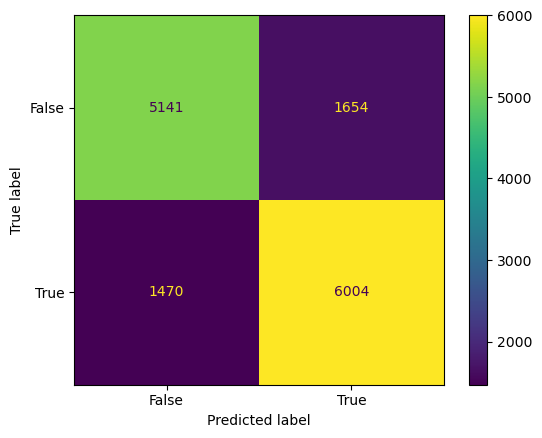

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


## Linear Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Assume X and y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your preprocessing pipeline
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])  # Add numerical features here
], remainder='passthrough')

# One-hot encode the categorical target variable
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

linear_reg_model = LinearRegression()

pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', linear_reg_model)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train_encoded)

# Predict using the pipeline
y_pred = pipe.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_encoded.values.argmax(axis=1), y_pred.argmax(axis=1))}")
print(classification_report(y_test_encoded.values.argmax(axis=1), y_pred.argmax(axis=1)))


Accuracy: 0.7795921227836569
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6829
           1       0.78      0.80      0.79      7440

    accuracy                           0.78     14269
   macro avg       0.78      0.78      0.78     14269
weighted avg       0.78      0.78      0.78     14269



In [57]:
print("y_test:", y_test[:10])
print("y_pred:", y_pred[:10])

print("y_test type:", type(y_test))
print("y_pred type:", type(y_pred))

print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))



y_test: 31028     0
119693    1
49366     1
62340     1
24721     0
47323     0
96362     1
17505     0
108466    0
122379    1
Name: result, dtype: int64
y_pred: [[0.52575115 0.47424885]
 [0.64829054 0.35170946]
 [0.72062337 0.27937663]
 [0.43034451 0.56965549]
 [0.67979091 0.32020909]
 [0.78018167 0.21981833]
 [0.29863185 0.70136815]
 [0.53406918 0.46593082]
 [0.42472047 0.57527953]
 [0.05077044 0.94922956]]
y_test type: <class 'pandas.core.series.Series'>
y_pred type: <class 'numpy.ndarray'>
y_test unique values: [0 1]
y_pred unique values: [-1.91910031 -1.49785913 -1.2129429  ...  2.2129429   2.49785913
  2.91910031]


In [58]:
y_pred_labels = np.argmax(y_pred, axis=1)


In [59]:
y_pred_labels = np.argmax(y_pred, axis=1)


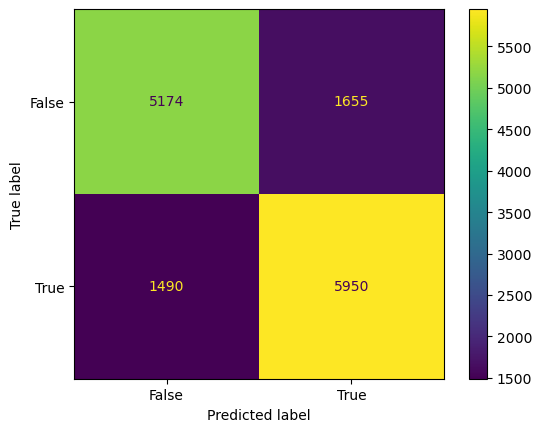

In [60]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_labels)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [62]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

## KNN

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming X and y are your data
# Replace this with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])
], remainder='passthrough')

# Define the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=500)  # Adjust the number of neighbors as needed

# Create the pipeline
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', knn_classifier)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('step2', KNeighborsClassifier(n_neighbors=500))])

In [65]:
from sklearn.metrics import mean_squared_error
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Training Accuracy: 73.84%
Test Accuracy: 73.28%
Mean Squared Error: 0.2672226505010863
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      6829
           1       0.73      0.77      0.75      7440

    accuracy                           0.73     14269
   macro avg       0.73      0.73      0.73     14269
weighted avg       0.73      0.73      0.73     14269



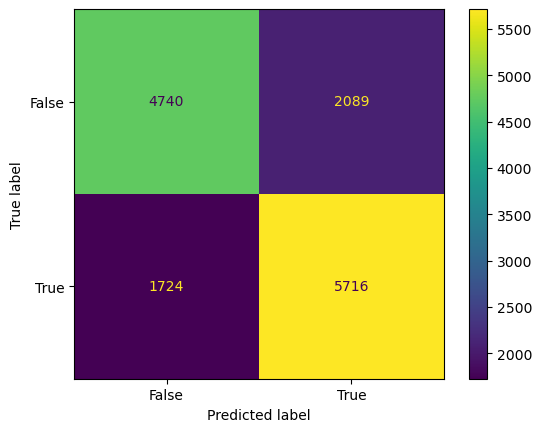

In [66]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Naive Bayes

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming you have a training set X and corresponding labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your preprocessing pipeline
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])  # Add numerical features here
], remainder='passthrough')

# Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Pipeline
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', naive_bayes_model)
])

# Fit the pipeline with the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('step2', GaussianNB())])

In [69]:
# Define hyperparameters to search
param_grid = {
    # You can add more hyperparameters to search here if needed
    'step2__priors': [None],  # The prior probabilities of the classes (set to None for automatic estimation)
}

In [70]:
# Grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the pipelinew with the best hyperparameters to your training data
best_pipe = grid_search.best_estimator_
best_pipe.fit(X_train, y_train)

Best Hyperparameters: {'step2__priors': None}


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('step2', GaussianNB())])

In [71]:
from sklearn.metrics import mean_squared_error
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Training Accuracy: 70.67%
Test Accuracy: 70.63%
Mean Squared Error: 0.2937136449646086
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6829
           1       0.72      0.72      0.72      7440

    accuracy                           0.71     14269
   macro avg       0.71      0.71      0.71     14269
weighted avg       0.71      0.71      0.71     14269



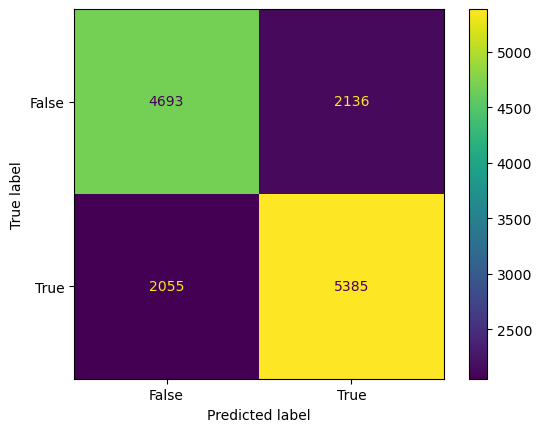

In [72]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Decision Tree

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming you have a training set X and corresponding labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer
trf = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])  # Add numerical features here
], remainder='passthrough')

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', dt_classifier)
])

# Fit the pipeline with the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [74]:
from sklearn.metrics import mean_squared_error
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Training Accuracy: 85.47%
Test Accuracy: 84.22%
Mean Squared Error: 0.15775457285023478
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      6829
           1       0.84      0.86      0.85      7440

    accuracy                           0.84     14269
   macro avg       0.84      0.84      0.84     14269
weighted avg       0.84      0.84      0.84     14269



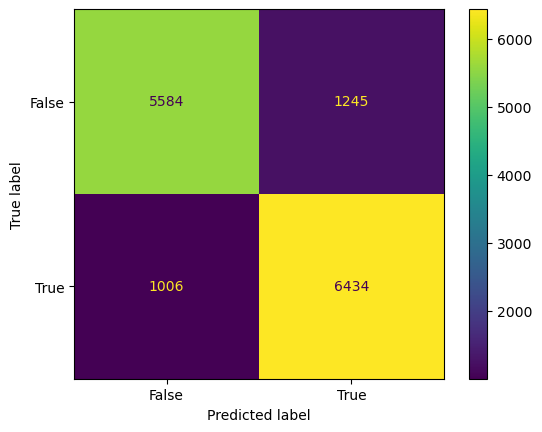

In [75]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Random Forest

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have a training set X and corresponding labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer
trf = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])  # Add numerical features here
], remainder='passthrough')

# Define the RandomForest classifier
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=10, random_state=42)  # You can adjust hyperparameters as needed

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', rf_classifier)
])

# Fit the pipeline with the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

## Random Forest

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have a training set X and corresponding labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer
trf = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])  # Add numerical features here
], remainder='passthrough')

# Define the RandomForest classifier
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=10, random_state=42)  # You can adjust hyperparameters as needed

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', rf_classifier)
])

# Fit the pipeline with the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [78]:
from sklearn.metrics import mean_squared_error
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Training Accuracy: 87.50%
Test Accuracy: 86.62%
Mean Squared Error: 0.13378653024038126
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6829
           1       0.88      0.87      0.87      7440

    accuracy                           0.87     14269
   macro avg       0.87      0.87      0.87     14269
weighted avg       0.87      0.87      0.87     14269



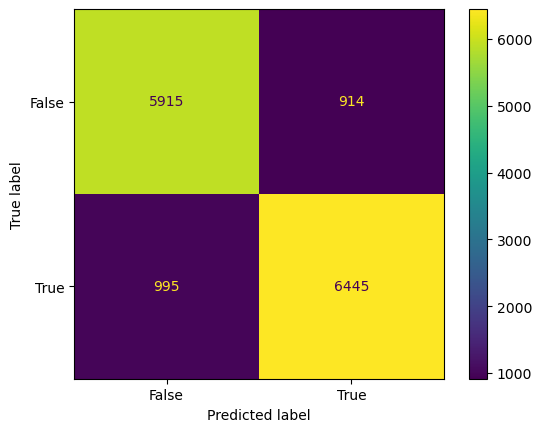

In [79]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


## XGBoost

In [81]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:03
   ---------------------------------------- 0.3/124.9 MB 1.7 MB/s eta 0:01:13
   ---------------------------------------- 0.5/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.0/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 1.1/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.3/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 1.4/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 1.4/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 1.4/124.9 MB 3.8 MB/s eta 0:00

In [82]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming X and y are your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer
trf = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
    ('scaler', MinMaxScaler(), ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr'])
], remainder='passthrough')

# Define the XGBClassifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # 'binary:logistic' is for binary classification
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
    colsample_bytree=0.7,
    max_depth=5,
    random_state=42
)

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', xgb_classifier)
])

# Fit the pipeline with the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [83]:

from sklearn.metrics import mean_squared_error
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Training Accuracy: 91.58%
Test Accuracy: 91.32%
Mean Squared Error: 0.0868315929637676
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6829
           1       0.91      0.92      0.92      7440

    accuracy                           0.91     14269
   macro avg       0.91      0.91      0.91     14269
weighted avg       0.91      0.91      0.91     14269



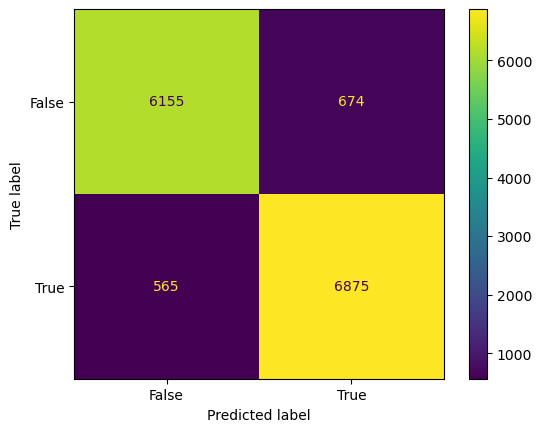

In [84]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

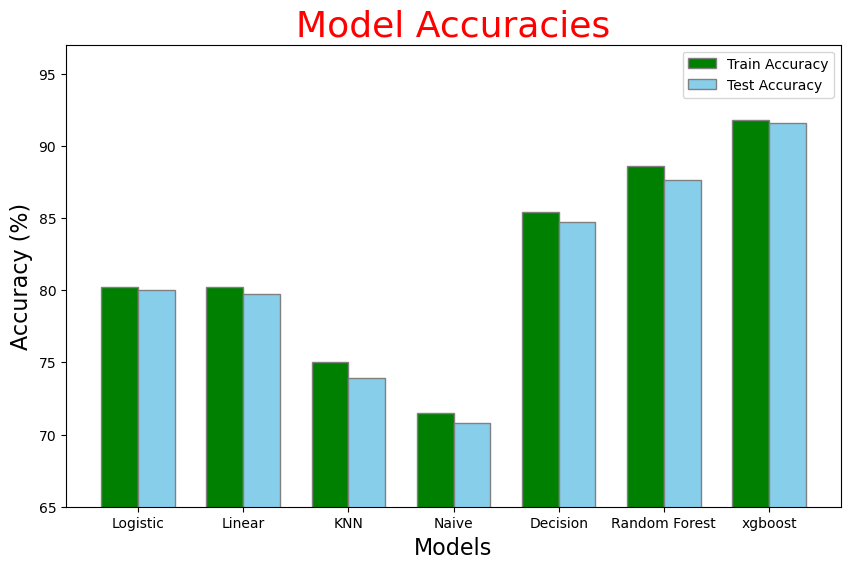

In [92]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
models = ['Logistic', 'Linear', 'KNN', 'Naive', 'Decision', 'Random Forest','xgboost']
bar_width = 0.35 
test_accuracies = [80.0, 79.7, 73.9, 70.8, 84.7, 87.6, 91.6]
train_accuracies = [80.2, 80.2, 75.0, 71.5, 85.4, 88.6, 91.8]
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.bar(r1, train_accuracies, color='green', width=bar_width, edgecolor='grey', label='Train Accuracy')
plt.bar(r2, test_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Test Accuracy')
plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Model Accuracies', fontsize=26,color='red')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.ylim(65, 97)
plt.legend()
plt.show()


In [93]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,93.438071,62.791460,-49.121458,166.653146,7.445002,10.559087
std,50.054945,33.297385,34.392164,29.273648,2.276611,13.842953
min,-15.000000,-2.000000,-123.000000,66.000000,0.000000,-516.000000
25%,54.000000,35.000000,-78.000000,148.000000,6.260870,7.263158
50%,93.000000,64.000000,-49.000000,166.000000,7.486726,8.974359
75%,131.000000,92.000000,-19.000000,186.000000,8.694915,11.010989
max,250.000000,119.000000,9.000000,251.000000,42.000000,684.000000


In [94]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [95]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [96]:
temp_df,target=match_progression(delivery_df,110,pipe)
temp_df

Target- 212


,end_of_over,runs_after_over,wickets_in_over,lose,win
18429,1,6,6,94.7,5.3
18436,2,9,7,94.2,5.8
18442,3,19,6,95.3,4.7
18448,4,6,6,95.0,5.0
18454,5,15,6,95.3,4.7
18460,6,10,6,95.3,4.7
18466,7,7,6,95.0,5.0
18472,8,8,6,95.6,4.4
18479,9,4,7,96.3,3.7
18485,10,14,6,95.5,4.5


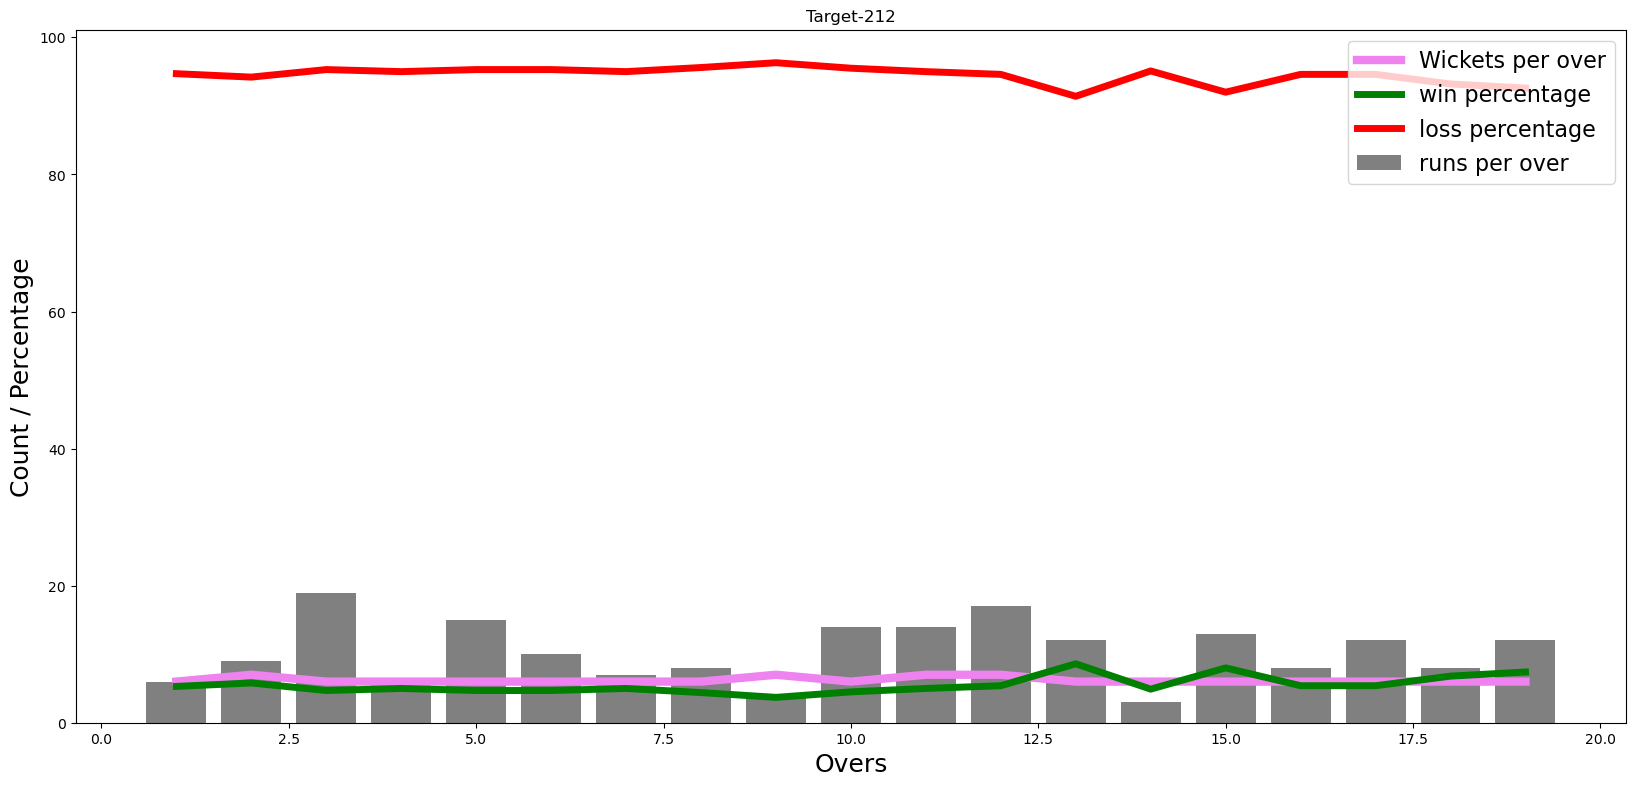

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='violet',linewidth=6,label='Wickets per over')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=5,label='win percentage')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=5,label='loss percentage')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],color='grey',label='runs per over')
plt.title('Target-' + str(target))
plt.xlabel("Overs",fontsize=18)
plt.ylabel("Count / Percentage",fontsize=18)
plt.legend(loc='upper right',fontsize=16)
plt.show()

In [98]:
temp_df,target=match_progression(delivery_df,320,pipe)
temp_df

Target- 206


,end_of_over,runs_after_over,wickets_in_over,lose,win
60804,1,2,6,28.2,71.8
60810,2,5,6,28.2,71.8
60816,3,7,6,30.6,69.4
60822,4,11,6,33.1,66.9
60828,5,7,6,33.1,66.9
60834,6,20,6,11.8,88.2
60840,7,5,6,22.4,77.6
60846,8,8,6,23.3,76.7
60852,9,6,6,30.5,69.5
60858,10,14,6,15.4,84.6


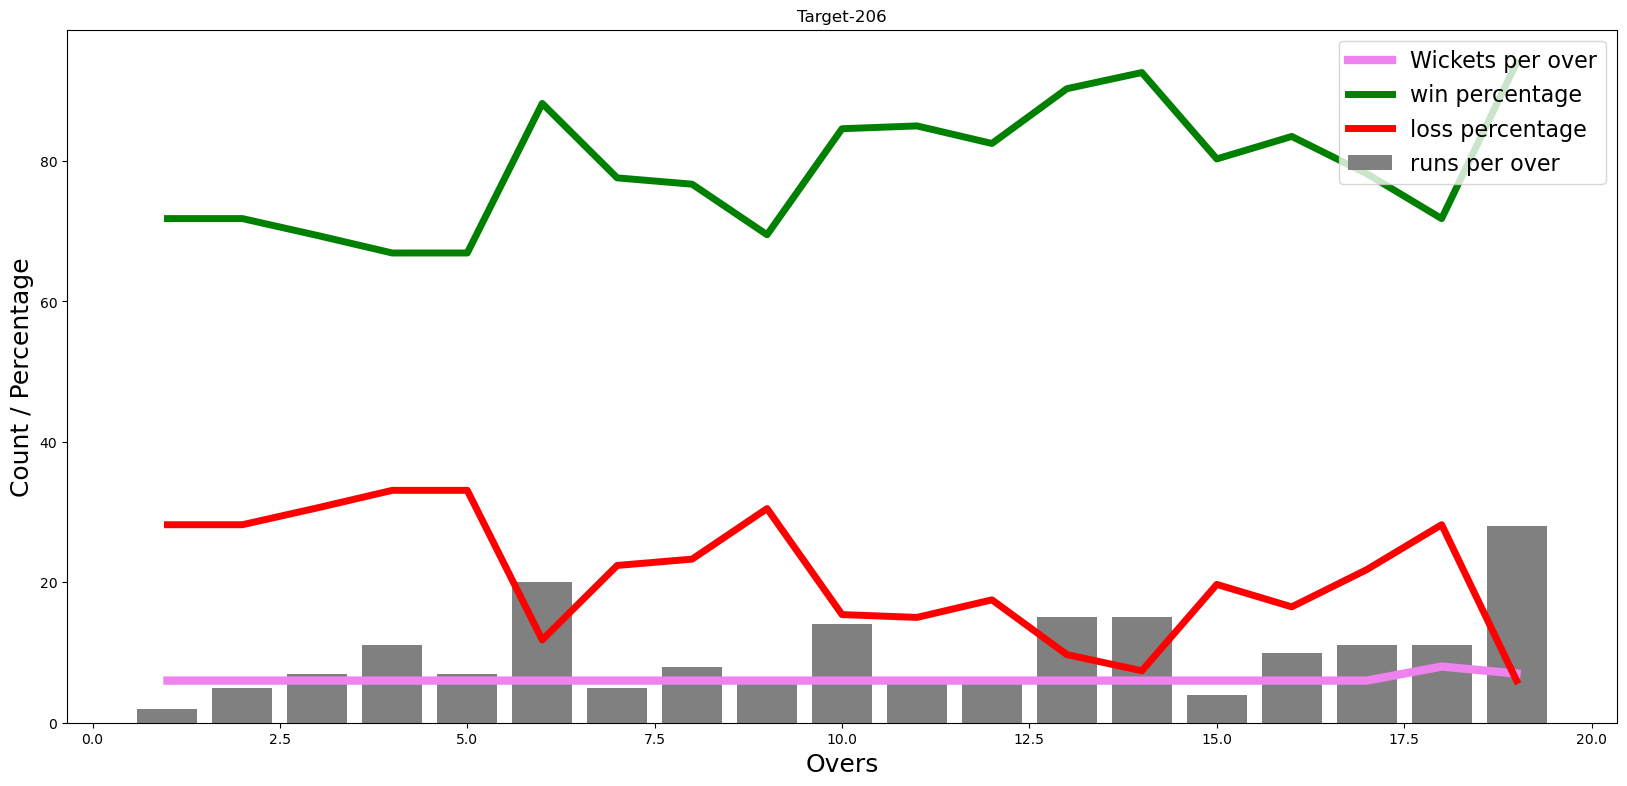

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='violet',linewidth=6,label='Wickets per over')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=5,label='win percentage')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=5,label='loss percentage')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],color='grey',label='runs per over')
plt.title('Target-' + str(target))
plt.xlabel("Overs",fontsize=18)
plt.ylabel("Count / Percentage",fontsize=18)
plt.legend(loc='upper right',fontsize=16)
plt.show()


Target- 132
      end_of_over  runs_after_over  wickets_in_over  lose   win
3518            1                3                6  74.6  25.4
3525            2                4                7  73.5  26.5
3531            3               11                6  67.3  32.7
3539            4                6                8  75.0  25.0
3545            5                4                6  73.8  26.2
3551            6               11                6  66.7  33.3
3557            7                1                6  68.4  31.6
3564            8                3                7  69.7  30.3
3570            9                5                6  68.8  31.2


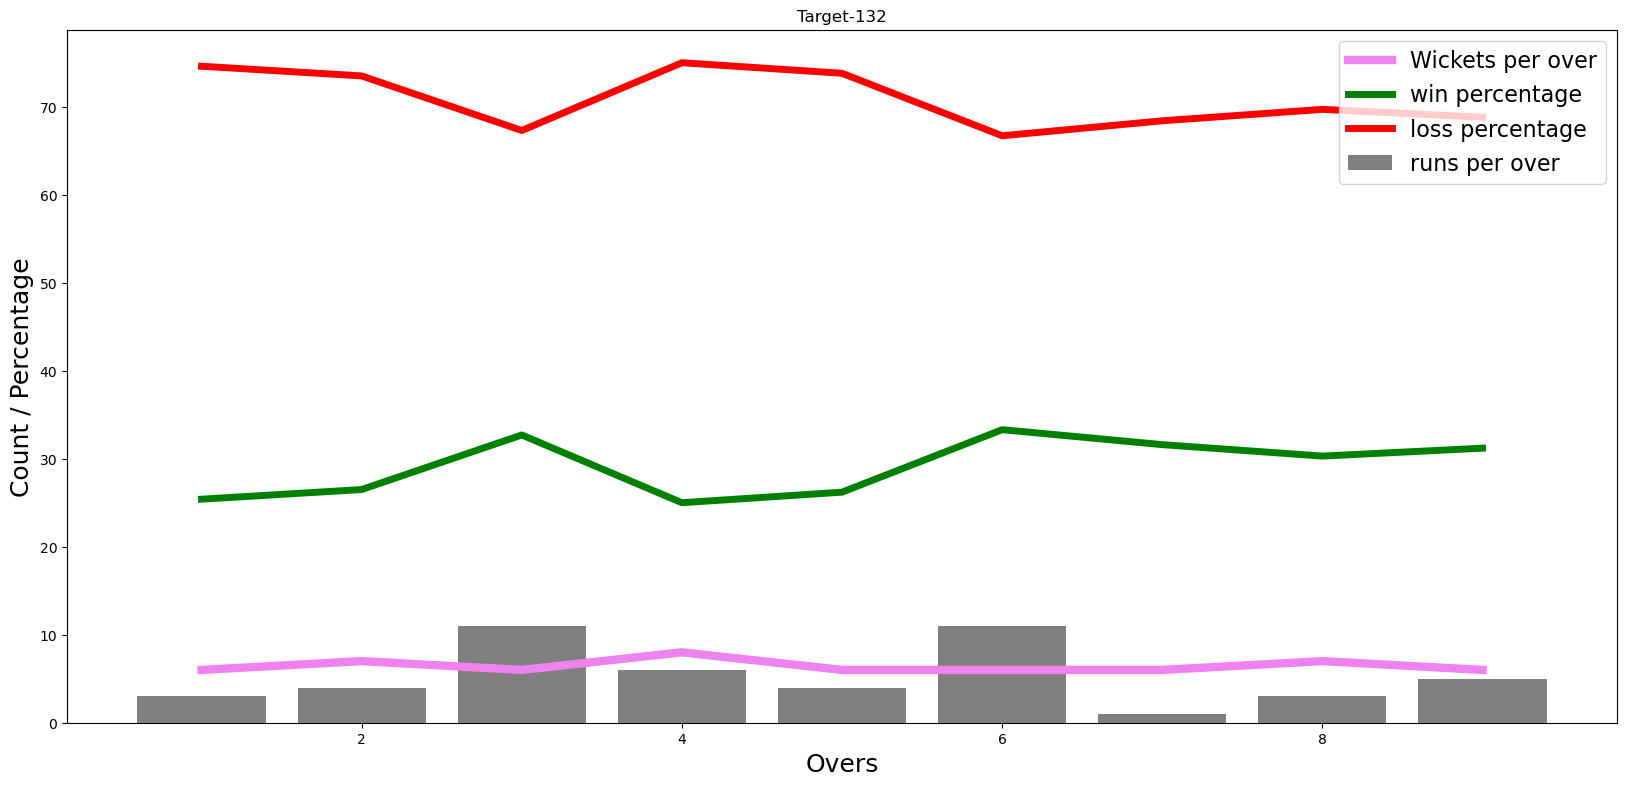

In [101]:
temp_df,target=match_progression(delivery_df,27,pipe)
print(temp_df)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='violet',linewidth=6,label='Wickets per over')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=5,label='win percentage')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=5,label='loss percentage')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],color='grey',label='runs per over')
plt.title('Target-' + str(target))
plt.xlabel("Overs",fontsize=18)
plt.ylabel("Count / Percentage",fontsize=18)
plt.legend(loc='upper right',fontsize=16)
plt.show()


Target- 179
       end_of_over  runs_after_over  wickets_in_over  lose   win
10459            1                4                6  64.8  35.2
10467            2                8                8  64.8  35.2
10473            3                1                6  71.3  28.7
10479            4                7                6  71.3  28.7
10485            5               12                6  71.3  28.7
10491            6               13                6  55.5  44.5
10497            7                9                6  53.7  46.3
10505            8               15                8  45.7  54.3
10511            9                7                6  46.8  53.2
10518           10               17                7  39.9  60.1
10524           11                9                6  33.5  66.5
10530           12                9                6  30.3  69.7
10536           13                8                6  23.9  76.1
10542           14                8                6  19.5  80.5
10548        

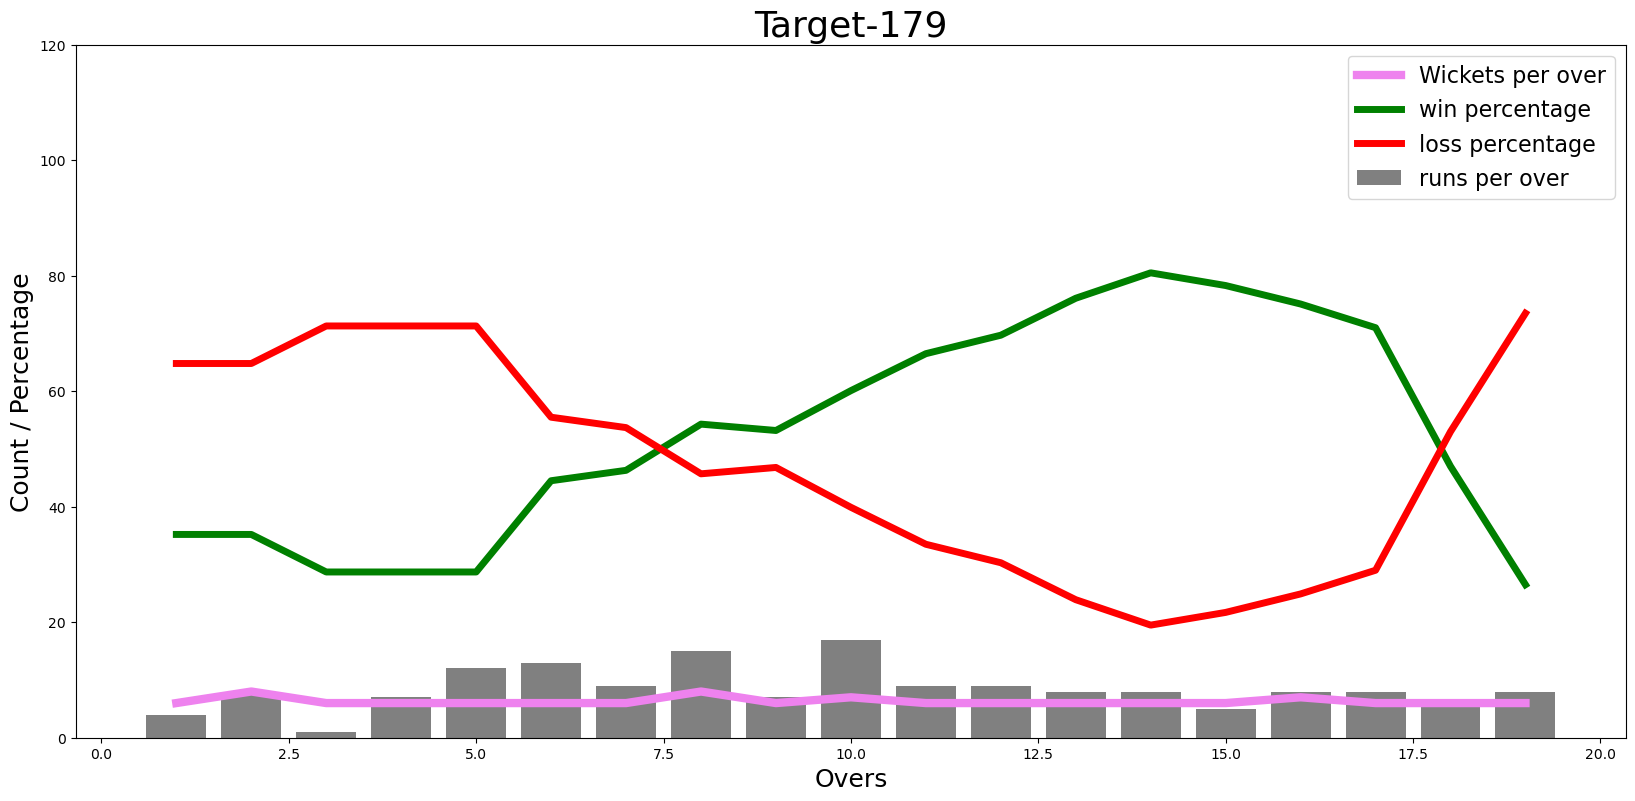

In [102]:
temp_df,target=match_progression(delivery_df,74,pipe)
print(temp_df)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='violet',linewidth=6,label='Wickets per over')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=5,label='win percentage')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=5,label='loss percentage')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],color='grey',label='runs per over')
plt.title('Target-' + str(target),fontsize=26)
plt.xlabel("Overs",fontsize=18)
plt.ylabel("Count / Percentage",fontsize=18)
plt.legend(loc='upper right',fontsize=16)
plt.ylim(0, 120)

plt.show()